# Project: Analyse des publications Twitter de WeRateDogs
### Auteur : Philippe BORRIBO

## Table des matières
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#rassembler">Rassembler les données </a></li>
<li><a href="#evaluation">Evaluation des données</a></li>
<li><a href="#nettoyage">Nettoyage des données</a></li> 
<li><a href="#stockage">Stockage des données</a></li>
<li><a href="#visualisation">Analyse et Visualisation</a></li> 
<li><a href="#conclusion">Conclusion</a></li>
<li><a href="#limitation">Limitation</a></li>
</ul>

<a id='intro'></a>
# 1. Introduction 

WeRateDogs est un compte Twitter qui évalue les chiens des gens avec un commentaire humoristique sur le chien. 

Elle dispose d'une quantité importante des données contenant des images, des textes, ...etc qu'elle a bien voulu partager avec Udacity dans le cadre de ce travail. Sur ce, nous nous pencherons dessus et essaierons de faire une analyse assez poussée de cet ensemble pour y ressortir des réponses à nos différentes questions. 

<a id='rassembler'></a>
# 2. Rassembler les données 

In [1]:
# -- importation des bilbliothèques
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns

Nos dataset étant très grands, nous ferons appel à la méthode "set_option" de pandas pour bien les visualiser

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
df_archive = pd.read_csv('twitter-archive-enhanced.csv')
df_image = pd.read_csv('image-predictions.tsv', sep='\t')

# -- Fonction pour lire le fichier JSON --
def lecture_fichier(lien):
    data = list()
    filename = open(lien,"r")
    for line in filename:
        data.append(json.loads(line))
    filename.close()
    return data
    
    
df_json = pd.DataFrame(lecture_fichier('tweet-json'))

<a id='evaluation'></a>
# 3. Evaluation des données

Avec 3 ensembles à notre disposition, nous les évaluerons l'un après l'autre pour être sûr de ne pas oublier l'un d'eux

## 3.1. Dataset des archives

In [4]:
df_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1164,723179728551723008,NaN,NaN,2016-04-21 16:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jangle. She's addicted to broccoli. It...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/723179728...,8,10,Jangle,None,None,None,None
980,749774190421639168,NaN,NaN,2016-07-04 01:17:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lucy. She's a Benebop Cumberplop. 12/1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749774190...,12,10,Lucy,None,None,None,None
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/801115127...,12,10,Bones,doggo,None,pupper,None
1566,687841446767013888,NaN,NaN,2016-01-15 03:39:15 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",13/10 I can't stop watching this (vid by @k8ly...,NaN,NaN,NaN,https://vine.co/v/iOWwUPH1hrw,13,10,None,None,None,None,None


In [5]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

Avec 2356 entrées (lignes), notre ensemble a cependant quelques lignes qui manquent des valeurs.

Pour ce faire, nous ferons une visualisation avec 'heatmap' pour voir l'étendue de ce manque

<AxesSubplot:title={'center':'Visualisation des valeurs manquantes \n'}>

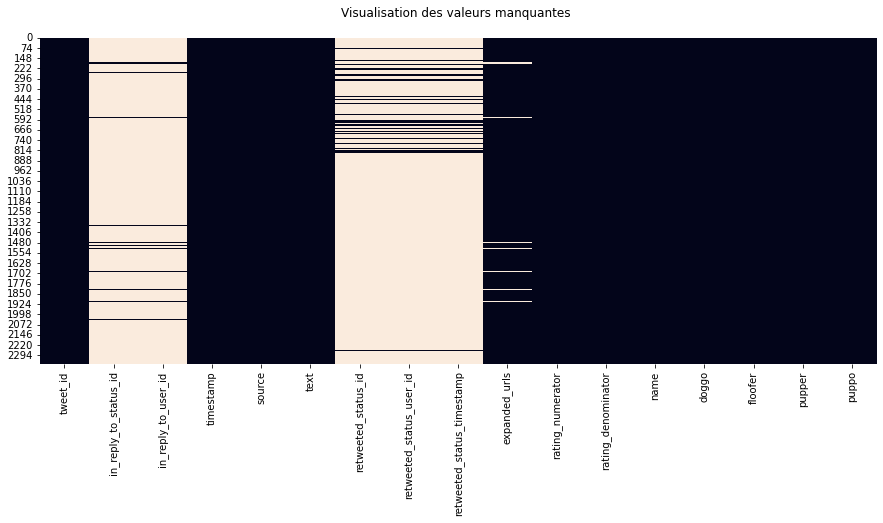

In [6]:
plt.figure(figsize=(15,6))
plt.title('Visualisation des valeurs manquantes \n')
plt.xlabel('Les colonnes')
plt.ylabel('Les enregistrements')
sns.heatmap(df_archive.isna(), cbar=False)

> Pour les valeurs manquantes, nous avons déterminé que 6 colonnes manquaient des valeurs

In [7]:
for colonne in df_archive.select_dtypes('object'):
    if colonne in ['timestamp','retweeted_status_timestamp']:
        #on ne prend pas les colonnes contenant des dates
        continue
    else:
        print(f'{colonne:-<40}\n {df_archive[colonne].unique()}\n')

source----------------------------------
 ['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'
 '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>'
 '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>'
 '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>']

text------------------------------------
 ["This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU"
 "This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV"
 'This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB'
 ...
 'Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR'
 'This is a western brown Mitsubishi 

In [8]:
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [9]:
# -- Recherche des lignes dupliquées --
df_archive.duplicated().sum()

0

In [10]:
# -- Recherche des id duliquées --
df_archive.tweet_id.duplicated().sum()

0

Pour clore, nous avons soulevé les problèmes suivants :
> les problèmes de qualité :
- <p style="color:red";>Certaines colonnes ont des valeurs manquantes</p>
- <p style="color:red";>le type de données de certaines colonnes ne sont pas corrects telle que la colonne 'timestamp' qui est de type 'object' alors que celle-ci contient des dates</p>
- <p style="color:red";>les erreurs de frappe dans les colonnes 'rating_numerator' et 'rating_denominator' sont aussi à corriger. Certaines cotes sont déraisonnables</p>
- <p style="color:red";>le nom de certains chiens sont incorrects</p>
 

## 3.2. Dataset des images


In [11]:
df_image.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
195,669583744538451968,https://pbs.twimg.com/media/CUrW3DWXIAAiRqk.jpg,1,candle,0.174315,False,lampshade,0.120407,False,plunger,0.072099,False
173,669006782128353280,https://pbs.twimg.com/media/CUjKHs0WIAECWP3.jpg,1,Chihuahua,0.127178,True,Italian_greyhound,0.054215,True,pillow,0.048592,False
2044,886258384151887873,https://pbs.twimg.com/media/DEyfTG4UMAE4aE9.jpg,1,pug,0.943575,True,shower_cap,0.025286,False,Siamese_cat,0.002849,False
905,700151421916807169,https://pbs.twimg.com/media/CbdwATgWwAABGID.jpg,1,tennis_ball,0.328236,False,Italian_greyhound,0.176838,True,Staffordshire_bullterrier,0.134080,True
1681,813812741911748608,https://pbs.twimg.com/media/C0s-XtzWgAAp1W-.jpg,1,French_bulldog,0.709146,True,Boston_bull,0.247621,True,boxer,0.018855,True


In [12]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [13]:
# -- Recherche des lignes dupliquées --
df_image.duplicated().sum()

0

In [14]:
df_image.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


Nous n'avons aucune valeur aberrante

In [15]:
for colonne in df_image.select_dtypes(['object', 'bool']):
    print(f'{colonne:-<40}\n {df_image[colonne].unique()}\n')

jpg_url---------------------------------
 ['https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg'
 'https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg'
 'https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg' ...
 'https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg'
 'https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg'
 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg']

p1--------------------------------------
 ['Welsh_springer_spaniel' 'redbone' 'German_shepherd'
 'Rhodesian_ridgeback' 'miniature_pinscher' 'Bernese_mountain_dog'
 'box_turtle' 'chow' 'shopping_cart' 'miniature_poodle' 'golden_retriever'
 'Gordon_setter' 'Walker_hound' 'pug' 'bloodhound' 'Lhasa'
 'English_setter' 'hen' 'desktop_computer' 'Italian_greyhound'
 'Maltese_dog' 'three-toed_sloth' 'ox' 'malamute' 'guinea_pig'
 'soft-coated_wheaten_terrier' 'Chihuahua' 'black-and-tan_coonhound'
 'coho' 'toy_terrier' 'Blenheim_spaniel' 'Pembroke' 'llama'
 'Chesapeake_Bay_retriever' 'curly-coated_retriever' 'dalmatian'
 'Ibizan_hound' 'Border_colli

> <p style="color:red";>Cet ensemble de données n'a pas de problème des valeurs manquantes, des valeurs dupliquées moins encore d'ordre.</p> 

## 3.3. Dataset du fichier 'JSON'

In [16]:
df_json.sample(5)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
442,Thu Jan 12 00:55:47 +0000 2017,819347104292290561,819347104292290561,Say hello to Anna and Elsa. They fall asleep i...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 819347090459463681, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,1383,8008,False,False,False,False,en,NaN,NaN,NaN,NaN
997,Wed Jun 29 18:25:21 +0000 2016,748220828303695873,748220828303695873,Stop what you're doing and watch this heckin m...,False,"[0, 103]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",NaN,None,NaN,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,8825,15549,False,False,False,False,en,NaN,NaN,NaN,NaN
1910,Wed Dec 09 01:07:00 +0000 2015,674394782723014656,674394782723014656,This is Gary. He's a hide and seek champion. S...,False,"[0, 110]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 674394776565891077, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,635,1607,False,False,False,False,en,NaN,NaN,NaN,NaN
693,Fri Oct 14 00:47:00 +0000 2016,786729988674449408,786729988674449408,RT @dog_rates: This is Oakley. He has no idea ...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,2827,0,False,False,NaN,NaN,en,{'created_at': 'Sat Jul 30 17:56:51 +0000 2016...,NaN,NaN,NaN
865,Sat Aug 06 17:26:19 +0000 2016,761976711479193600,761976711479193600,This is Shelby. She finds stuff to put on her ...,False,"[0, 105]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 761976704302714881, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,2310,5992,False,False,False,False,en,NaN,NaN,NaN,NaN


In [17]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2354 non-null   object 
 1   id                             2354 non-null   int64  
 2   id_str                         2354 non-null   object 
 3   full_text                      2354 non-null   object 
 4   truncated                      2354 non-null   bool   
 5   display_text_range             2354 non-null   object 
 6   entities                       2354 non-null   object 
 7   extended_entities              2073 non-null   object 
 8   source                         2354 non-null   object 
 9   in_reply_to_status_id          78 non-null     float64
 10  in_reply_to_status_id_str      78 non-null     object 
 11  in_reply_to_user_id            78 non-null     float64
 12  in_reply_to_user_id_str        78 non-null     o

In [18]:
df_json.describe()

,id,in_reply_to_status_id,in_reply_to_user_id,retweet_count,favorite_count,quoted_status_id
count,2.354000e+03,7.800000e+01,7.800000e+01,2354.000000,2354.000000,2.900000e+01
mean,7.426978e+17,7.455079e+17,2.014171e+16,3164.797366,8080.968564,8.162686e+17
std,6.852812e+16,7.582492e+16,1.252797e+17,5284.770364,11814.771334,6.164161e+16
min,6.660209e+17,6.658147e+17,1.185634e+07,0.000000,0.000000,6.721083e+17
25%,6.783975e+17,6.757419e+17,3.086374e+08,624.500000,1415.000000,7.888183e+17
50%,7.194596e+17,7.038708e+17,4.196984e+09,1473.500000,3603.500000,8.340867e+17
75%,7.993058e+17,8.257804e+17,4.196984e+09,3652.000000,10122.250000,8.664587e+17
max,8.924206e+17,8.862664e+17,8.405479e+17,79515.000000,132810.000000,8.860534e+17


<AxesSubplot:title={'center':'Visualisation des valeurs manquantes \n'}>

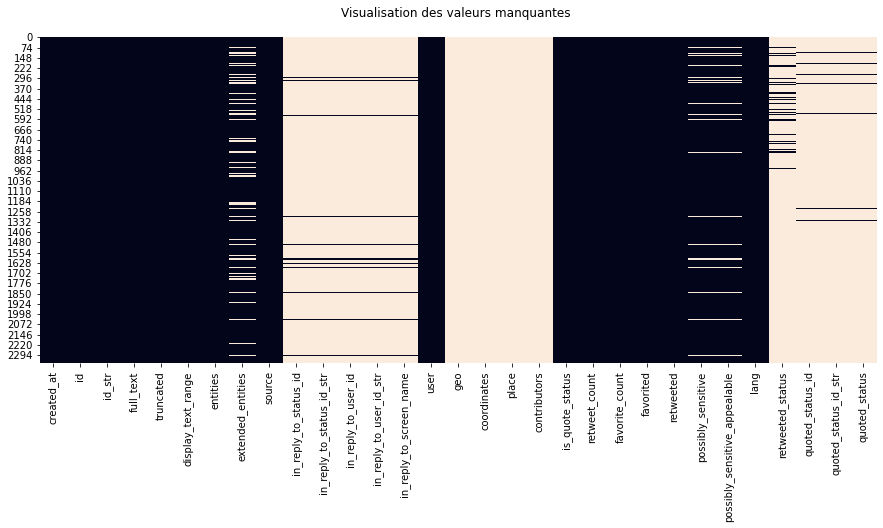

In [19]:
plt.figure(figsize=(15,6))
plt.title('Visualisation des valeurs manquantes \n')
plt.xlabel('Les colonnes')
plt.ylabel('Les enregistrements')
sns.heatmap(df_json.isna(), cbar=False)

Après visualisation, nous remarquons qu'il y a des colonnes totalement vides et certaines ont un pourcentage très élevé de valeurs manquantes

Pour cet ensemble de données, nous avons soulevé les problèmes suivants que nous avons classé en deux catégories :
> les problèmes de qualité :
- <p style="color:red";>Certaines colonnes ont des valeurs manquantes, d'autres même n'en ont pas un seul</p>
- <p style="color:red";>le type de données de certaines colonnes ne sont pas corrects telle que la colonne 'created_at' qui est de type 'object' alors que celle-ci contient des dates</p>
- <p style="color:red";>les erreurs de frappe dans les colonnes 'rating_numerator' et 'rating_denominator' sont aussi à corriger. Certaines cotes sont déraisonnables</p>

> les problèmes d'ordre :
- <p style="color:red";>la présence inutile de certaines colonnes telle que 'in_reply_to_status_id_str' étant donné que cette dernière existe déjà avec le type adéquat</p>


<a id='nettoyage'></a>
# 4. Nettoyage des données

Avant de commencer le nettoyage, nous fixerons certaines conditions qui nous permettront de faire des bonnes analyses. celles-ci sont :

- <p style="color:green";>L'intervalle de confiance est fixée à 75% : Nous ne garderons que les colonnes qui ont au moins de 75% de leur valeur total</p>
- <p style="color:green";>Pour les colonnes ayant un format numérique('int', 'float'), tous les 'NaN' seront remplacés par -1000</p>
- <p style="color:green";>Les valeurs manquantes pour les colonnes de type 'object' seront remplacées par 'Unknown' </p>


## 4.1. Nettoyage Dataset des archives

In [20]:
(df_archive.isnull().sum()/len(df_archive)*100).describe()

count    17.000000
mean     27.813842
std      44.102227
min       0.000000
25%       0.000000
50%       0.000000
75%      92.317487
max      96.689304
dtype: float64

<h3>Suppression des colonnes ayant moins de 75% de leur valeur total</h3>

In [21]:
df_archive = df_archive[df_archive.columns[(df_archive.isnull().sum()/len(df_archive)*100)<75]]

In [22]:
df_archive.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
900,758740312047005698,2016-07-28 19:06:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Boston. He's worried because his tongue w...,https://twitter.com/dog_rates/status/758740312...,12,10,Boston,None,None,None,None
896,759099523532779520,2016-07-29 18:53:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Toby. He has a drinking problem. Inflatab...,https://twitter.com/dog_rates/status/759099523...,7,10,Toby,None,None,None,None
881,760521673607086080,2016-08-02 17:04:31 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Doggo want what doggo cannot have. Temptation ...,https://vine.co/v/5ApKetxzmTB,12,10,None,doggo,None,None,None
1276,709158332880297985,2016-03-13 23:24:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Rodney. He's a Ukranian Boomchicka. Outsi...,https://twitter.com/dog_rates/status/709158332...,10,10,Rodney,None,None,None,None
208,852311364735569921,2017-04-13 00:03:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Wiggles. She would like you to spot he...,https://twitter.com/dog_rates/status/852311364...,13,10,Wiggles,None,None,None,None


In [23]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2356 non-null   int64 
 1   timestamp           2356 non-null   object
 2   source              2356 non-null   object
 3   text                2356 non-null   object
 4   expanded_urls       2297 non-null   object
 5   rating_numerator    2356 non-null   int64 
 6   rating_denominator  2356 non-null   int64 
 7   name                2356 non-null   object
 8   doggo               2356 non-null   object
 9   floofer             2356 non-null   object
 10  pupper              2356 non-null   object
 11  puppo               2356 non-null   object
dtypes: int64(3), object(9)
memory usage: 221.0+ KB


sur les 16 colonnes de départ, nous ne restons qu'avec 11 colonnes

<h3>Modificaion du Dtype de la colonne 'timestamp'</h3>

In [24]:
df_archive['timestamp']= pd.to_datetime(df_archive['timestamp'])
df_archive.timestamp.dtypes

datetime64[ns, UTC]

<h3>Nettoyage de 'rating_numerator' et 'rating_denominator'</h3>

Les cotes ne sont que des proportions.
C'est pourquoi nous allons créer une colonne 'rating' contenant la valeur du rapport (rating_numerator/rating_denominator) et nous ne garderons que les valeurs comprises entre 0 et 1

In [25]:
df_archive['rating'] = df_archive['rating_numerator'] / df_archive['rating_denominator']

In [26]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2356 non-null   int64              
 1   timestamp           2356 non-null   datetime64[ns, UTC]
 2   source              2356 non-null   object             
 3   text                2356 non-null   object             
 4   expanded_urls       2297 non-null   object             
 5   rating_numerator    2356 non-null   int64              
 6   rating_denominator  2356 non-null   int64              
 7   name                2356 non-null   object             
 8   doggo               2356 non-null   object             
 9   floofer             2356 non-null   object             
 10  pupper              2356 non-null   object             
 11  puppo               2356 non-null   object             
 12  rating              2356 non-null 

In [27]:
df_archive.query('rating >= 0 & rating <=1').count()

tweet_id              905
timestamp             905
source                905
text                  905
expanded_urls         888
rating_numerator      905
rating_denominator    905
name                  905
doggo                 905
floofer               905
pupper                905
puppo                 905
rating                905
dtype: int64

sur les 2536 lignes, seuls 905 sont valides en terme de cote. C'est avec celles-là que nous allons travailler

In [28]:
df_archive = df_archive.query('rating >= 0 & rating <=1')

<h3>Remplissage des valeurs nulles</h3>

Vérifions à présent s'il n'y a plus de valeur nulle à traiter et passer au 2e ensemble de données

In [29]:
df_archive.isnull().sum()

tweet_id               0
timestamp              0
source                 0
text                   0
expanded_urls         17
rating_numerator       0
rating_denominator     0
name                   0
doggo                  0
floofer                0
pupper                 0
puppo                  0
rating                 0
dtype: int64

## 4.2. Nettoyage Dataset des images

In [30]:
(df_image.isnull().sum()/len(df_image)*100).describe()

count    12.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0
dtype: float64

Nous pouvons encore affirmer qu'il n'y a pas de valeurs manquantes

In [31]:
df_image = df_image[df_image.columns[(df_image.isnull().sum()/len(df_image)*100)<75]]
df_image.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
738,687124485711986689,https://pbs.twimg.com/media/CYkoE10WEAAWqxm.jpg,1,car_mirror,0.997121,False,seat_belt,0.000375,False,beagle,0.000216,True
1082,718454725339934721,https://pbs.twimg.com/media/Cfh2w6HWIAIIYAF.jpg,1,hammer,0.169865,False,hatchet,0.115744,False,chime,0.068092,False
241,670444955656130560,https://pbs.twimg.com/media/CU3mITUWIAAfyQS.jpg,1,English_springer,0.403698,True,Brittany_spaniel,0.347609,True,Welsh_springer_spaniel,0.137186,True
358,672614745925664768,https://pbs.twimg.com/media/CVWbitUW4AAzclx.jpg,1,starfish,0.712717,False,goldfish,0.258865,False,sea_cucumber,0.002015,False
68,667182792070062081,https://pbs.twimg.com/media/CUJPNjOWsAAZRqP.jpg,1,golden_retriever,0.949892,True,Irish_setter,0.010564,True,Chesapeake_Bay_retriever,0.005821,True


In [32]:
(df_json.isnull().sum()/len(df_json)*100).describe()

count     31.000000
mean      41.813523
std       48.497590
min        0.000000
25%        0.000000
50%        6.074766
75%       96.686491
max      100.000000
dtype: float64

<h3>Suppression des colonnes ayant moins de 75% de leur valeur total</h3>

In [33]:
df_json = df_json[df_json.columns[(df_json.isnull().sum()/len(df_json)*100)<75]]
df_json.sample(5)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,user,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang
2347,Mon Nov 16 00:35:11 +0000 2015,666051853826850816,666051853826850816,This is an odd dog. Hard on the outside but lo...,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666051848592334848, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,879,1253,False,False,False,False,en
1176,Mon Apr 11 15:43:12 +0000 2016,719551379208073216,719551379208073216,This is Harnold. He accidentally opened the fr...,False,"[0, 118]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 719551372954365953, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,2192,5515,False,False,False,False,en
2211,Sun Nov 22 23:12:44 +0000 2015,668567822092664832,668567822092664832,This is Marvin. He can tie a bow tie better th...,False,"[0, 82]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 668567813263630345, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,62,265,False,False,False,False,en
1812,Tue Dec 15 04:19:18 +0000 2015,676617503762681856,676617503762681856,I promise this wasn't meant to be a cuteness o...,False,"[0, 131]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 676617499136409600, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,1108,3149,False,False,False,False,en
884,Mon Aug 01 02:45:22 +0000 2016,759943073749200896,759943073749200896,Here's a wicked fast pupper. 12/10 camera coul...,False,"[0, 87]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,2382,6581,False,False,False,False,en


In [34]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   created_at                     2354 non-null   object
 1   id                             2354 non-null   int64 
 2   id_str                         2354 non-null   object
 3   full_text                      2354 non-null   object
 4   truncated                      2354 non-null   bool  
 5   display_text_range             2354 non-null   object
 6   entities                       2354 non-null   object
 7   extended_entities              2073 non-null   object
 8   source                         2354 non-null   object
 9   user                           2354 non-null   object
 10  is_quote_status                2354 non-null   bool  
 11  retweet_count                  2354 non-null   int64 
 12  favorite_count                 2354 non-null   int64 
 13  fav

Sur les 30 colonnes, il nous en reste 17

<h3>Suppression de la colonne id_str</h3>

le DataFrame contient déjà la colonne 'id' avec le bon type. il serait inutile de garder la colonne 'id_str' qui contient les mêmes informations avec une différence de type

In [35]:
df_json.drop('id_str', axis=1, inplace=True)

<h3>Modificaion du Dtype de la colonne 'created_at'</h3>

In [36]:
df_json['created_at']= pd.to_datetime(df_json['created_at'])
df_json.created_at.dtypes

datetime64[ns, UTC]

<h3>Remplissage des valeurs nulles</h3>

Nous allons itérer sur les colonnes de différent type et leur attribuer les valeurs prédéfinies

In [37]:
for colonne in df_json.select_dtypes(['object']):
    df_json[colonne].fillna('Unknown', inplace=True)

In [38]:
for colonne in df_json.select_dtypes(['int']):
    df_json[colonne].fillna('-1000', inplace=True)

<h3>Vérification</h3>

Vérifions finalement qu'il ne reste plus de valeur nulle dans notre DataFrame

In [39]:
df_json.isnull().sum()

created_at                       0
id                               0
full_text                        0
truncated                        0
display_text_range               0
entities                         0
extended_entities                0
source                           0
user                             0
is_quote_status                  0
retweet_count                    0
favorite_count                   0
favorited                        0
retweeted                        0
possibly_sensitive               0
possibly_sensitive_appealable    0
lang                             0
dtype: int64

<a id='stockage'></a>
# 5. Stockage des données

Avant de commencer quoi que ce soit, nous allons premièrement reunir nos 3 DataFrame en un seul

Nous commencerons par df_archive et df_image avec lesquelles nous ferons une jointure interne

<h3>Fusion des DataFrame</h3>

In [40]:
df_full = pd.merge(df_archive,df_image, on=['tweet_id'], how='inner')

Passons maintenant à df_json.

Avant la fusion, nous allons renommer la colonne 'id' de df_json en 'tweet_id' 

In [41]:
df_json.rename(columns={'id':'tweet_id'}, inplace=True)

In [42]:
df_full = pd.merge(df_full,df_json, on=['tweet_id'], how='inner')
df_full.sample(5)

,tweet_id,timestamp,source_x,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,created_at,full_text,truncated,display_text_range,entities,extended_entities,source_y,user,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang
95,747512671126323200,2016-06-27 19:31:23+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Guys pls stop sending actual sharks. It's too ...,https://twitter.com/dog_rates/status/747512671...,10,10,None,None,None,None,None,1.0,https://pbs.twimg.com/media/Cl-yykwWkAAqUCE.jpg,1,Cardigan,0.111493,True,malinois,0.095089,True,German_shepherd,0.080146,True,2016-06-27 19:31:23+00:00,Guys pls stop sending actual sharks. It's too ...,False,"[0, 115]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 747512645096476672, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,1803,6110,False,False,False,False,en
683,669970042633789440,2015-11-26 20:04:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Julio. He was one of the original Ring...,https://twitter.com/dog_rates/status/669970042...,10,10,Julio,None,None,None,None,1.0,https://pbs.twimg.com/media/CUw2MV4XIAAHLO_.jpg,1,miniature_pinscher,0.734744,True,Rottweiler,0.131066,True,Doberman,0.081509,True,2015-11-26 20:04:40+00:00,This is Julio. He was one of the original Ring...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 669970030231232512, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,65,317,False,False,False,False,en
170,718971898235854848,2016-04-10 01:20:33+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Sadie. She is prepared for battle. 10/...,https://twitter.com/dog_rates/status/718971898...,10,10,Sadie,None,None,None,None,1.0,https://pbs.twimg.com/media/CfpNGTHUIAAA8XC.jpg,1,golden_retriever,0.140394,True,Saint_Bernard,0.118769,True,Labrador_retriever,0.075492,True,2016-04-10 01:20:33+00:00,This is Sadie. She is prepared for battle. 10/...,False,"[0, 72]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 718971861124521984, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,1231,3818,False,False,False,False,en
96,747461612269887489,2016-06-27 16:08:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Never seen a shark hold another shark like thi...,https://twitter.com/dog_rates/status/747461612...,10,10,None,None,None,None,None,1.0,https://pbs.twimg.com/media/Cl-EXHSWkAE2IN2.jpg,1,binoculars,0.192717,False,barbershop,0.085838,False,ballplayer,0.084672,False,2016-06-27 16:08:30+00:00,Never seen a shark hold another shark like thi...,False,"[0, 113]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 747461595794673665, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,1169,4249,False,False,False,False,en
830,666104133288665088,2015-11-16 04:02:55+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Not familiar with this breed. No tail (weird)....,https://twitter.com/dog_rates/status/666104133...,1,10,None,None,None,None,None,0.1,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False,2015-11-16 04:02:55+00:00,Not familiar with this breed. No tail (weird)....,False,"[0, 134]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666104129232740352, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,6871,14765,False,False,False,False,en


In [43]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 847 entries, 0 to 846
Data columns (total 40 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   tweet_id                       847 non-null    int64              
 1   timestamp                      847 non-null    datetime64[ns, UTC]
 2   source_x                       847 non-null    object             
 3   text                           847 non-null    object             
 4   expanded_urls                  847 non-null    object             
 5   rating_numerator               847 non-null    int64              
 6   rating_denominator             847 non-null    int64              
 7   name                           847 non-null    object             
 8   doggo                          847 non-null    object             
 9   floofer                        847 non-null    object             
 10  pupper                    

<h3>Enregistrement</h3>

In [44]:
df_full.to_csv('twitter_archive_master.csv')

<a id='visualisation'></a>
# 6. Analyse et Visualisation

Executons dès à présent notre code

<h3>Questions</h3>

Dans cette analyse, nous essaierons de répondre à certaines questions. Celles-ci sont :
- <p style="color:blue";>Question 1: Quelle race de chien est la moins bien notée ? </p>
-<p style="color:blue";>Question 2: Quelle race est la mieux reconnue par l'algorithme de classement d'image ?</p>
-<p style="color:blue";>Question 3: Quels sont les tweets qui ont été les plus partagés ?</p>


<h3>Résolution Question 1</h3>

D'abord, nous allons récuperer les lignes où les chiens ont été correctement identifié par l'algorithme

In [45]:
# -- Fonction de de récupreation et de classement --
def classement(df):
    liste = list()
    dictionnaire = dict()
    for index, row in df.iterrows():
        if((row['p1_conf'] > row['p2_conf']) and (row['p1_conf'] > row['p3_conf'])):
            dictionnaire['race'] = row['p1']
            dictionnaire['pourcentage'] = row['p1_conf']
            dictionnaire['rating'] = row['rating']
            liste.append(dictionnaire)
            dictionnaire = {}
        elif((row['p2_conf'] > row['p1_conf']) and (row['p2_conf'] > row['p3_conf'])):
            dictionnaire['race'] = row['p2']
            dictionnaire['pourcentage'] = row['p2_conf']
            dictionnaire['rating'] = row['rating']
            liste.append(dictionnaire)
            dictionnaire = {}
        elif((row['p3_conf'] > row['p1_conf']) and (row['p3_conf'] > row['p2_conf'])):
            dictionnaire['race'] = row['p3']
            dictionnaire['pourcentage'] = row['p3_conf']
            dictionnaire['rating'] = row['rating']
            liste.append(dictionnaire)
            dictionnaire = {}
         
        
    return liste

Après recuprération de la liste des chiens ayant été bien identifiés, passons maintenant à la cotation.

In [46]:
df_tmp = pd.DataFrame(classement(df_full.query('(p1_conf > p2_conf & p1_conf > p3_conf & p1_dog==True)|(p2_conf > p1_conf & p2_conf > p3_conf & p2_dog==True)|(p3_conf > p1_conf & p3_conf > p2_conf & p3_dog==True)')))
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   race         550 non-null    object 
 1   pourcentage  550 non-null    float64
 2   rating       550 non-null    float64
dtypes: float64(2), object(1)
memory usage: 13.0+ KB


Nous nous retrouvons avec 550 enregistrements correctement identifiés comme celles des chiens et ayant des notes corrects

In [47]:
liste = ['rating']
df_tmp.groupby(['race'])[liste].mean().reset_index().sort_values(by='rating')

,race,rating
0,Afghan_hound,0.300000
32,Japanese_spaniel,0.500000
90,miniature_schnauzer,0.700000
66,black-and-tan_coonhound,0.700000
24,Great_Dane,0.750000
78,flat-coated_retriever,0.750000
5,Bedlington_terrier,0.766667
47,Rhodesian_ridgeback,0.800000
60,Welsh_springer_spaniel,0.800000
11,Brittany_spaniel,0.800000


<p style="color:green";>Nous pouvons voir, après analyse, que la race 'Afghan_hound' est la race la moins bien notée</p>

<h3>Résolution Question 2</h3>

Pour cette question, nous nous baserons sur le DataFrame obtenu à la première question

In [48]:
liste = ['pourcentage']
df_tmp.groupby(['race'])[liste].mean().reset_index().sort_values(by='pourcentage', ascending=False)

,race,pourcentage
84,komondor,0.999956
82,keeshond,0.994944
59,Weimaraner,0.965741
11,Brittany_spaniel,0.938169
79,giant_schnauzer,0.841265
71,bull_mastiff,0.811250
44,Pekinese,0.784075
46,Pomeranian,0.781477
22,German_short-haired_pointer,0.762317
92,pug,0.760545


<p style="color:green";>Nous observons que la race komodor est celle qui a obtenu le plus de succès avec l'algorithme. Elle est suivie de près par la race keeshond et weimaraner</p>

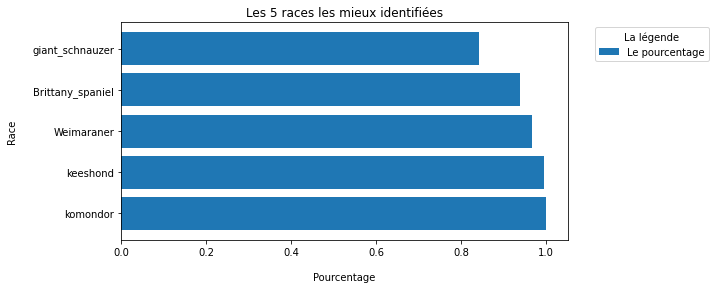

In [49]:
plt.figure(figsize = (8,4))
plt.barh((df_tmp.groupby('race')['pourcentage'].mean().reset_index().sort_values(by='pourcentage', ascending=False)).race.head(),(df_tmp.groupby('race')['pourcentage'].mean().reset_index().sort_values(by='pourcentage', ascending=False)).pourcentage.head(), label='Le pourcentage')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',title = 'La légende')
plt.title('Les 5 races les mieux identifiées')
plt.xlabel('Pourcentage', labelpad=15)
plt.ylabel('Race', labelpad=15)
plt.show()

<h3>Résolution Question 3</h3>

In [50]:
liste =['retweet_count']
df_full.groupby('tweet_id')[liste].sum().reset_index().sort_values(by='retweet_count', ascending=False)

,tweet_id,retweet_count
796,761672994376806400,33421
369,676219687039057920,31989
719,739544079319588864,24319
790,759566828574212096,24319
463,682962037429899265,15043
821,778396591732486144,14198
602,703041949650034688,14198
839,828708714936930305,12882
846,883482846933004288,10407
725,740373189193256964,9220


le tweet le plus partagé est celui dont l'id vaut : **761672994376806400**

In [51]:
df_full.query('tweet_id==761672994376806400')

,tweet_id,timestamp,source_x,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,created_at,full_text,truncated,display_text_range,entities,extended_entities,source_y,user,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang
50,761672994376806400,2016-08-05 21:19:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Ohboyohboyohboyohboyohboyohboyohboyohboyohboyo...,https://twitter.com/dog_rates/status/761672994...,10,10,None,None,None,None,None,1.0,https://pbs.twimg.com/ext_tw_video_thumb/76167...,1,gondola,0.318851,False,sea_lion,0.306525,False,pool_table,0.111565,False,2016-08-05 21:19:27+00:00,Ohboyohboyohboyohboyohboyohboyohboyohboyohboyo...,False,"[0, 112]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 761672828462718981, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,33421,55016,False,False,False,False,in


<a id='conclusion'></a>
# 7. Conclusion

Arrivé au terme de notre projet, nous avons pu répondre aux différentes questions posées et nous pouvons tirer les conclusions suivantes :

> le **Afghan_hound** est la race la moins bien noté de WeRateDogs... on pourrait aller plus loin en disant qu'elle est la moins appreciée

> la race **Komodor** est celle qui a obtenu la meilleure observation dans l'algorithme de classement avec **99,9956%**

> le tweet le plus partagé est celui dont l'id dans df_full vaut **761672994376806400**



<a id='limitation'></a>
# 8. Limitation

Tout au long de notre analyse des données de WeRateDogs, nous avons rencontré des limitations que nous aimerions partager avec vous.

Les 2 plus grandes étant :

> **L'accès aux données**: Se trouvant sous plusieurs formats, nous avons dû appliquer différentes méthodes pour y accéder et aboutir à cette analyse.




>**Le traitement des données** : Compte tenu du volume des données et des erreurs s'y trouvant, cela n'a pas été une partie de plaisir de traiter au maximum une grande partie des problèmes liés.